In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
from preprocessing import Split, StandardScaler, CreateMatrix

In [3]:
df = pd.read_csv('bdi.csv')

In [4]:
df.fillna(method='ffill', inplace=True)

In [5]:
data = df['bdi'].values

In [6]:
x, y = CreateMatrix(data, 90)

In [7]:
x_train, y_train, x_val, y_val, x_test, y_test = Split(x, y)

In [8]:
scaler = StandardScaler(y_train)
x_train = scaler.transform(x_train)
y_train = scaler.transform(y_train)
x_val = scaler.transform(x_val)
y_val = scaler.transform(y_val)
x_test = scaler.transform(x_test)

In [9]:
svr=svm.SVR(kernel='linear')
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [10]:
predict = svr.predict(x_test)

In [11]:
predict = scaler.inverse_transform(predict)

In [93]:
table = []
end = 30

In [94]:
from sklearn import metrics

In [95]:
start=0
ls = []
tmp = x_test[start].reshape(1,90)
for _ in range(end):
    pred = svr.predict(tmp).reshape(1, 1)
    ls.append(pred)
    tmp = np.concatenate((tmp, pred), axis=1)[:, -90:]
ls = np.array(ls).reshape(-1)
ls = scaler.inverse_transform(ls)

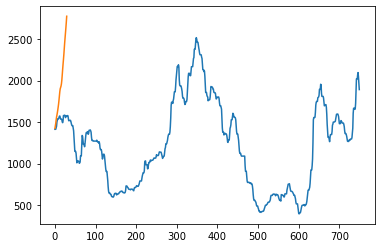

In [97]:
plt.plot(y_test)
plt.plot(ls)

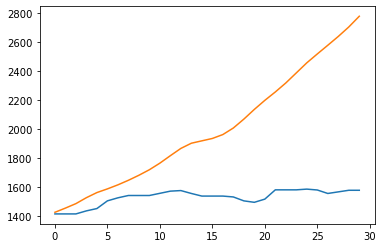

In [98]:
plt.plot(y_test[0:30])
plt.plot(ls)